<a href="https://colab.research.google.com/github/mnaqeeb06/AI-Lab-Work/blob/main/iterative_deepening_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative Deepening DFS


> Muhammad Naqeeb

> fa20-bcs-012

> To: Mr. Qazi Zia

## Iterative Deepening Depth-First Search Algorithm.

The Iterative Deepening Depth-First Search (also ID-DFS) algorithm is an algorithm used to find a node in a tree. This means that given a tree data structure, the algorithm will return the first node in this tree that matches the specified condition. Nodes are sometimes referred to as vertices (plural of vertex) - here, we’ll call them nodes. The edges have to be unweighted. This algorithm can also work with unweighted graphs if mechanism to keep track of already visited nodes is added.

Description of the Algorithm The basic principle of the algorithm is to start with a start node, and then look at the first child of this node. It then looks at the first child of that node (grandchild of the start node) and so on, until a node has no more children (we’ve reached a leaf node). It then goes up one level, and looks at the next child. If there are no more children, it goes up one more level, and so on, until it find more children or reaches the start node. If hasn’t found the goal node after returning from the last child of the start node, the goal node cannot be found, since by then all nodes have been traversed.

So far this has been describing Depth-First Search (DFS). Iterative deepening adds to this, that the algorithm not only returns one layer up the tree when the node has no more children to visit, but also when a previously specified maximum depth has been reached. Also, if we return to the start node, we increase the maximum depth and start the search all over, until we’ve visited all leaf nodes (bottom nodes) and increasing the maximum depth won’t lead to us visiting more nodes.

Specifically, these are the steps:

For each child of the current node If it is the target node, return If the current maximum depth is reached, return Set the current node to this node and go back to 1. After having gone through all children, go to the next child of the parent (the next sibling) After having gone through all children of the start node, increase the maximum depth and go back to 1. If we have reached all leaf (bottom) nodes, the goal node doesn’t exist.

Example of the Algorithm Consider the following tree:

Tree for the Iterative Deepening Depth-First Search algorithm

The steps the algorithm performs on this tree if given node 0 as a starting point, in order, are:

* Visiting Node 0
* Visiting Node 1
* Current maximum depth reached, returning…
* Visiting Node 2
* Current maximum depth reached, returning…
* Increasing depth to 2
* Visiting Node 0
* Visiting Node 1
* Visiting Node 3
* Current maximum depth reached, returning…
* Visiting Node 4
* Current maximum depth reached, returning…
* Visiting Node 2
* Visiting Node 5
* Current maximum depth reached, returning…
* Visiting Node 6
* Found the node we’re looking for, returning…




### **Runtime of the Algorithm.**
If we double the maximum depth each time we need to go deeper, the runtime complexity of Iterative Deepening Depth-First Search (ID-DFS) is the same as regular Depth-First Search (DFS), since all previous depths added up will have the same runtime as the current depth (1/2 + 1/4 + 1/8 + … < 1). The runtime of regular Depth-First Search (DFS) is O(|N|) (|N| = number of Nodes in the tree), since every node is traversed at most once. The number of nodes is equal to b^d, where b is the branching factor and d is the depth, so the runtime can be rewritten as O(b^d).

### **Space of the Algorithm.**

The space complexity of Iterative Deepening Depth-First Search (ID-DFS) is the same as regular Depth-First Search (DFS), which is, if we exclude the tree itself, O(d), with d being the depth, which is also the size of the call stack at maximum depth. If we include the tree, the space complexity is the same as the runtime complexity, as each node needs to be saved.

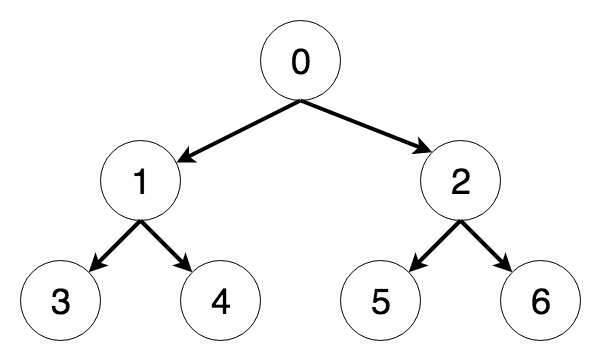

In [2]:
def iterative_deepening_dfs(start, target):
    """
    Implementation of iterative deepening DFS (depth-first search) algorithm to find the shortest path from a start to a target node..
    Given a start node, this returns the node in the tree below the start node with the target value (or null if it doesn't exist)
    Runs in O(n), where n is the number of nodes in the tree, or O(b^d), where b is the branching factor and d is the depth.
    :param start:  the node to start the search from
    :param target: the value to search for
    :return: The node containing the target value or null if it doesn't exist.
    """
    # Start by doing DFS with a depth of 1, keep doubling depth until we reach the "bottom" of the tree or find the node we're searching for
    depth = 1
    print(start)
    bottom_reached = False  # Variable to keep track if we have reached the bottom of the tree
    while not bottom_reached:
        # One of the "end nodes" of the search with this depth has to still have children and set this to False again
        result, bottom_reached = iterative_deepening_dfs_rec(start, target, 0, depth)
        if result is not None:
            # We've found the goal node while doing DFS with this max depth
            return result

        # We haven't found the goal node, but there are still deeper nodes to search through
        depth *= 2
        print("Increasing depth to " + str(depth))

    # Bottom reached is True.
    # We haven't found the node and there were no more nodes that still have children to explore at a higher depth.
    return None


def iterative_deepening_dfs_rec(node, target, current_depth, max_depth):
    print("Visiting Node " + str(node["value"]))

    if node["value"] == target:
        # We have found the goal node we we're searching for
        print("Found the node we're looking for!")
        return node, True

    if current_depth == max_depth:
        print("Current maximum depth reached, returning...")
        # We have reached the end for this depth...
        if len(node["children"]) > 0:
            # ...but we have not yet reached the bottom of the tree
            return None, False
        else:
            return None, True

    # Recurse with all children
    bottom_reached = True
    for i in range(len(node["children"])):
        result, bottom_reached_rec = iterative_deepening_dfs_rec(node["children"][i], target, current_depth + 1,
                                                                 max_depth)
        if result is not None:
            # We've found the goal node while going down that child
            return result, True
        bottom_reached = bottom_reached and bottom_reached_rec

    # We've gone through all children and not found the goal node
    return None, bottom_reached

start={"value": 0, "children":[
   {"value": 1, "children":[
     {"value": 3, "children":[  ]},
     {"value": 4, "children":[ ]}
     ]}, {
         "value": 2, "children":[
             {"value": 5, "children":[ ]},
             {"value": 6, "children":[ ]}
             ]
         }
   ]
}


print(iterative_deepening_dfs(start, 6) ["value"])

{'value': 0, 'children': [{'value': 1, 'children': [{'value': 3, 'children': []}, {'value': 4, 'children': []}]}, {'value': 2, 'children': [{'value': 5, 'children': []}, {'value': 6, 'children': []}]}]}
Visiting Node 0
Visiting Node 1
Current maximum depth reached, returning...
Visiting Node 2
Current maximum depth reached, returning...
Increasing depth to 2
Visiting Node 0
Visiting Node 1
Visiting Node 3
Current maximum depth reached, returning...
Visiting Node 4
Current maximum depth reached, returning...
Visiting Node 2
Visiting Node 5
Current maximum depth reached, returning...
Visiting Node 6
Found the node we're looking for!
6
